In [1]:
import pandas as pd
import numpy as np
import scipy
from scipy.stats import norm
import matplotlib.pyplot as plt
import random


In [6]:
#Generate geo Brownian motion 
#steps = time steps
# N = number of paths
#Rewrite r and T to make MC calculation
#Function to generate a geo path
def get_geo_path(T,r,d,sigma, S0,steps):
    dt= T/steps
    t = np.linspace(0,T,steps)
    Bt = [0]+ np.random.standard_normal(size=steps)
    Bt = np.cumsum(Bt)*np.sqrt(dt)
    path = S0*np.exp(((r-d)-0.5*sigma**2)*t+sigma*Bt)
    plt.plot(t,path)
    return path

def get_final_S():
        path = get_geo_path(T=1,r=0.05,d=0,sigma=0.2, S0=100,steps=100) #input parameters here
        S = path[-1]
        return S


# List that stores N final price of N paths
def list_of_final_S():
    list_of_final_S = []
    N=10000
    for i in range(0,N):
        S = get_final_S()
        list_of_final_S.append(S)
    return list_of_final_S

#payoff functions for forward call put dig call dig put zero coup

#list of forward payoffs for N geo bro mo paths
def list_forward_payoffs():
    S_list = list_of_final_S()
    payoff_list=[]
    K=230
    for i in range (0,len(S_list)):
        S = S_list[i]
        payoff_list.append(S-K)
    return payoff_list 

#list of call payoffs for N geo bro mo paths
def list_call_payoffs():
    S_list = list_of_final_S()
    payoff_list=[]
    K=230
    for i in range (0,len(S_list)):
        S = S_list[i]
        if S>K:
            payoff_list.append(S-K)
        else:
            payoff_list.append(0)
    return payoff_list 

#list of put payoffs for N geo bro mo paths
def list_put_payoffs():
    S_list = list_of_final_S()
    payoff_list=[]
    K=230
    for i in range (0,len(S_list)):
        S = S_list[i]
        if S<K:
            payoff_list.append(K-S)
        else:
            payoff_list.append(0)
    return payoff_list

#list of dig call payoffs for N geo bro mo paths
def list_dig_call_payoffs():
    S_list = list_of_final_S()
    payoff_list=[]
    K=110
    for i in range (0,len(S_list)):
        S = S_list[i]
        if S>K:
            payoff_list.append(1)
        else:
            payoff_list.append(0)
    return payoff_list

#list of dig put payoffs for N geo bro mo paths
def list_dig_put_payoffs():
    S_list = list_of_final_S()
    payoff_list=[]
    K=100
    for i in range (0,len(S_list)):
        S = S_list[i]
        if S<K:
            payoff_list.append(1)
        else:
            payoff_list.append(0)
    return payoff_list

# #list of zero coupon bond payoffs for N geo bro mo paths
# def list_zero_coup_payoffs():
#     ???


#Monte carlo method
def mc():
    r=0.05
    T=0
    payoff_list = list_dig_put_payoffs() #can change payoff to any instrument payoff function (i.e. put, dig call, etc)
    mc_price = np.mean(payoff_list)*np.exp(-r*T)
    return mc_price
        
    
    

In [ ]:
def black_scholes_call(S,K,T,r,d,sigma):
    d1 = (np.log(S/K)+(r+0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1-sigma*np.sqrt(T)

    call = S*norm.cdf(d1) - K*np.exp(-r*T)*norm.cdf(d2)
    print(call)
    return call



In [8]:
def get_geo_path(T,r,d,sigma, S0,steps):
    dt= T/steps
    t = np.linspace(0,T,steps)
    Bt = [0]+ np.random.standard_normal(size=steps)
    Bt = np.cumsum(Bt)*np.sqrt(dt)
    path = S0*np.exp(((r-d)-0.5*sigma**2)*t+sigma*Bt)
    plt.plot(t,path)
    return path

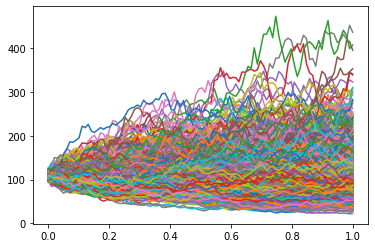

In [9]:
for N in range (0,1000):
    get_geo_path(1,0,0,0.5,110,100)